<h2>Trabalho Realizado Por:</h2>
<br>
Carlos Ferreira - a87953
<br>
Daniel Ribeiro - a87994

<h2>Exercício 2</h2>


2. Considere circuitos aritméticos $\,N\times 1\,$ (N inputs e 1 output), com “wires” de 16 bits  e “gates” de três tipos: 
    1. a “gate” binária $\,\oplus\,$ implementa $\mathtt{xor}\,$ bit a bit 
    2. a “gate” binária$\,+\,$ implementa soma aritmética ($\mathtt{add}$) de inteiros módulo $\,2^{16}\,$, 
    3. a “gate”  unária $\,\gg_r \,$ implementa o “right-shift-rotate” do argumento um número de posições dado pela constante $0<r< 16$.
    Os parâmetros do circuito são o número de inputs $N$, o número de “gates” $M$ e a razão $\gamma\,$ entre o número de “gates”  $\,\mathtt{add}\,$ e o número total de “gates”.


A função principal de geração é chamada de geraGrafo que leva como argumentos (N,M,γ), sendo estes gerados aleatoriamente como foi pedido.

A função de início calcula quantas gates do tipo add vamos ter, isto é possivel fazendo $M$ $\times$ $\gamma$

Depois com um for no intervalo [0,N+2*M], vamos criando os diferentes tipos de nodos, adicionando as suas propriedades e gerando ligaçoes aleatórias mas que façam sentido.

Ao longo da função são adicionados comentários para melhor entendimento da mesma




In [59]:
import networkx as nx
import itertools
import random
from timeit import timeit
import matplotlib.pyplot as plt
import math
# n inputs
# m gates
# γ razao


# gera uma string de 0 e 1  aleatoria de 16 bits

def geraOutput16Bits():
    s = ""
    for i in range (16):
        s+=str(random.randint(0,1))
    return s

# bin -> decimal

def fromBin(a):
    r = 0
    for i in range(16):
        r = 2*r
        if (a[i]=='1'):
            r = r+1
    return r



#adicionar uma aresta de entrada, no grafico G, diferente do ant, a entrar no i, com N e M para calcular Ranges,
#completamente aleatória


def adicionaIn (G,ant,i,N,M,d):
    
    if N==1:
        randomNumber = 0
        G.add_edge(0,i)
        d[i].append(0)
    
    else:
        randomNumber = random.randint(0, N+M-2)
        while randomNumber == ant:
            randomNumber = random.randint(0, N+M-2)
        G.add_edge(randomNumber,i)
        d[i].append(randomNumber)
    
    return G,randomNumber

#adicionar uma aresta de saída, no grafico G, diferente das que estão na lista l, a entrar no i, com N e M para calcular Ranges, 
#completamente aleatória

def adicionaOut (G,l,i,N,M,d,add):
    randomNumber = random.randint(N, N+M-1)    
    while randomNumber in l:
        randomNumber = random.randint(N,N+M-1)
    l.append(randomNumber)
    G.add_edge(i,randomNumber)
    d[i].append(randomNumber)
    if add :
        G.nodes[randomNumber]['val'] = geraOutput16Bits()
    
    
    return G,l


#funcao principal de geracao do grafico

def geraGrafo (N,M,γ):
    erro = 0   
    eCiclo = 1
    f = 0
    gatesAdd = round(M * γ)

    # se só existir 1 imput e existir gates ADD
    
    if N == 1 and gatesAdd > 0:
        erro = 1
        G = nx.DiGraph()
    
    # se só existir 1 input , haverá um gate ROTATE
    
    if N == 1:
        f = 1
    
    #caso o grafo gerado for um ciclo (validacao no final do while) geramos um novo
    while eCiclo == 1 and erro == 0:
        
        G = nx.DiGraph()
        l = []
        d = {}
        add = 0
            
        for i in range(0,N+2*M):
            #de [0,N[ são inputs
            if i < N:
                G.add_node(i)
                G.nodes[i]['tipo'] = 'INPUT'
            
            #de [N,N+M-1[ são Valores, (número de gates, pois cada uma dá um valor, - 1 (um valor vai ser o output))
            elif i < N+M-1:
                G.add_node(i)
                G.nodes[i]['tipo'] = 'VALOR'
                
            
            #N+M-1 é o output
            elif i == N+M-1:
                G.add_node(N + M -1)
                G.nodes[N + M -1]['tipo'] = 'OUTPUT'   
                G.nodes[N + M -1]['val'] = geraOutput16Bits()
                output = N + M - 1
            
            #[N+M-1,gatesAdd+N+M[ sao as gates do tipo add 
            elif i < gatesAdd+N+M:
                G.add_node(i)
                G.nodes[i]['tipo'] = 'ADD'
                d[i] = []
                add = 1

                #uma gate add tem 1 output e 2 inputs
                G,l = adicionaOut (G,l,i,N,M,d,add)
                add = 0
                G,k   = adicionaIn  (G,l[-1],i,N,M,d)
                G,_   = adicionaIn  (G,k,i,N,M,d)
                
            
            #as outras gates são rotate ou xor
            else:
                G.add_node(i)
                #escolhemos ao calhas rotate ou xor
                aux = random.randint(1,2)
                G.nodes[i]['tipo'] = 'ROTATE' if aux == 1 or f == 1 else 'XOR'
                d[i] = []
                #adicionamos 1 aresta com destino no nodo atual e 1 com inicio no nodo atual
                G,l = adicionaOut (G,l,i,N,M,d,add)
                G,k   = adicionaIn  (G,l[-1],i,N,M,d)
    
                if aux == 2:
                    
                    #caso seja xor precisamos de mais 1 aresta com destino no nodo atual
                    G,_   = adicionaIn  (G,k,i,N,M,d)

            #testar se é ciclo
            eCiclo = len(list(nx.simple_cycles(G))) > 0
            
    return G,d,output ,gatesAdd



A função geraGraf () vai chamar a que vimos anteriormente, é aqui que sao gerados os valores aleatórios, assim como fazemos testes se o gráfico está bem gerado ou se vai ser preciso gerar outro, finalmente esta função dá cores aos nodos e imprime o grafo resultado.

In [60]:
def geraGraf (): 
    #gerar valores aleatorios de M,N e γ
    M =  random.randint(1, 3)
    N =  random.randint(1, 2) 
    γ =  round(random.uniform(1/M, 1), 2) #1/M
    print("N=",N," M=",M," γ=",γ)
    
    
    #validaçoes para o grafo
    while(True):
        f = 1
        G,dic,output,gatesAdd = geraGrafo (N,M,γ)
        d = nx.get_node_attributes(G, 'tipo')
           
        
        for key in d:
            if d[key] == 'VALOR':
                #se tivermos valores que nao tenham arestas in ou arestas out rejeitamos o gráfo e geramos um novo
                if len(G.in_edges(key)) == 0 or len(G.out_edges(key)) == 0:
                    f = 0
            if d[key] == 'INPUT':
                #se tivermos Inputs que nao tenham arestas out rejeitamos o grafo também
                if len(G.out_edges(key)) == 0:
                    f = 0

        
        if f == 1:
            break
        
    k = 0
    
    for i in dic:
        dic[i].sort()

                    
                    
                    
    
    #parte de impressao de resultados
    
    #dicionário de cores se quisermos mudar as cores dos nodos
    cores= {
            'azulClaro':'#66cccc', 
            'vermelho':'red', 
            'azulEscuro':'#0043c0', 
            'azulNormal':'blue', 
            'laranja':'#FFA500', 
            'roxo':'#8a2be2' 
           }
      
        
    print("Dicionario: " + str(dic))
    
    print("\nNodos:\n",G.nodes.data())
    print("Nodo do output:" + str(output))
    print("Valor do output: " + G.nodes[output]['val'] + "  ou em decimal: " + str(fromBin(G.nodes[output]['val'])))


    labels = nx.get_node_attributes(G, 'tipo') 
    
    #cores para os nodos
    colors = [cores['azulClaro'] if i < N-k else 
              cores['azulEscuro'] if i < N + M -1-k else 
              cores['laranja'] if i == N + M -1-k else 
              cores['vermelho'] for i in range(0,N + 2*M - k)] 

    
    #tamanho do grafo
    plt.figure(figsize=(10,10))
    
    #layout que evita nodos sobrepostos
    #se for planar, um layout planar é melhor
    if (nx.check_planarity(G)):
        pos = nx.planar_layout(G)
    else:
    #se não for planar, usamos uma alternativa
        pos = nx.spring_layout(G)
        
    
    #desenhar o Grafo
    nx.draw(G, pos, labels= labels, font_size=14 , with_labels = True, node_size=2500, node_color=colors)

    return G , dic , N , M , γ , output , gatesAdd



Chamamos então a função e geramos um grafo:

N= 2  M= 2  γ= 0.67
Dicionario: {4: [1, 2, 3], 5: [0, 1, 2]}

Nodos:
 [(0, {'tipo': 'INPUT'}), (1, {'tipo': 'INPUT'}), (2, {'tipo': 'VALOR'}), (3, {'tipo': 'OUTPUT', 'val': '1000110011100000'}), (4, {'tipo': 'ADD'}), (5, {'tipo': 'XOR'})]
Nodo do output:3
Valor do output: 1000110011100000  ou em decimal: 36064


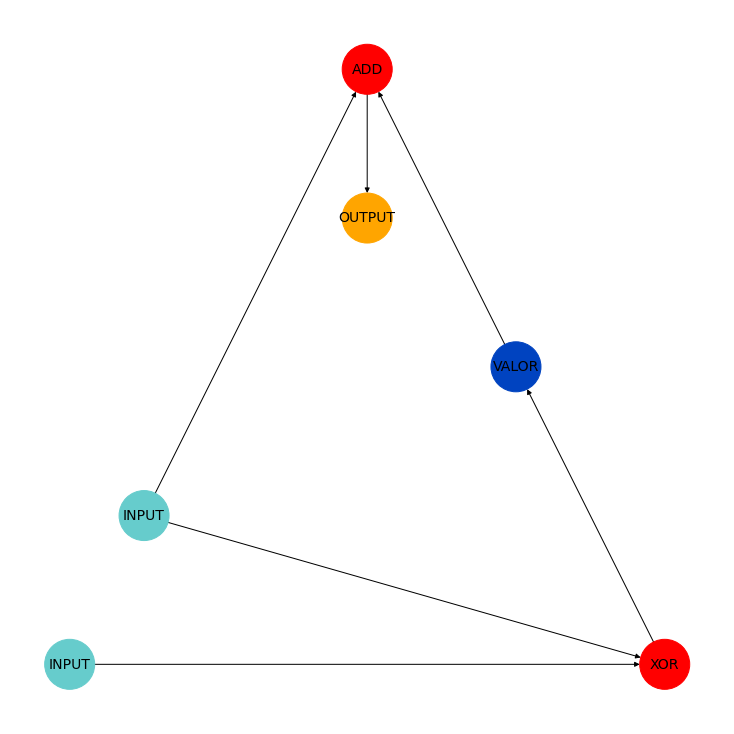

In [61]:
G , dic , N , M , γ , output , gatesAdd = geraGraf ()

Também calculamos o tempo para 20 execuções da nossa função, tendo ela tempos de execução baixíssimos, mas também variados, dependendo da "sorte" que tivermos nos números aleatórios

Text(0, 0.5, 'tempo em sec')

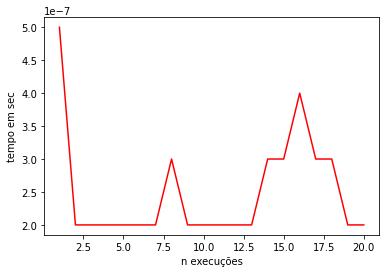

In [62]:
def tempos (v, f):
    
    t = []
    
    for i in range (1,v+1):
    
        time = timeit(setup="from __main__ import " + f ,\
                stmt= f ,number=1)
        t.append(time)
        
    return t


t = tempos ( 20 , "geraGraf")
n = range (1,21)
plt.plot(n, t, 'r')
plt.xlabel('n execuções')
plt.ylabel('tempo em sec')

Na função de descobrir os inputs dicidimos utilizar os BitVec, porque achamos que iria simplicar o processo em muita coisa, pois não temos de definir a soma , nem o xor para 16 bits.
Criámos um dicionário de bitvecs que vai guardar os inputs como BitVec , e vai guardar os resultados dos ADD e o output com BitVecVal.Depois para cada gate fomos adicionando ao solver que resultado desse gate deve ser obtido a partir dos inputs desse gate, muito apreciso para o xor e o add , mas no rotate adicionamos um Or pois pode ser a rotação de n bits , onde n varia de 1 a 15. Se for possivel a resolução vai apresentar os resultados , caso não seja dará unsat.

In [63]:
from z3 import *

# lista que vai dar os numeors dos nodos que são resultados de ADD's

def listaValoresAdd(G,dic):
    l = []
    for i in dic:
        if G.nodes[i]['tipo'] == 'ADD':
            l.append(dic[i][-1])
    return l

# bin -> decimal
    
def fromBin(a):
    r = 0
    for i in range(16):
        r = 2*r
        if (a[i]=='1'):
            r = r+1
    return r

# decimal -> bin

def toBin(a):
    r = []
    for _ in range(16):
        r.insert(0,'1' if a%2==1 else '0')
        a = a//2
    return ''.join(r)

#rotação para a direita

def rr (r,n):
    return (( r >> n ) | r << 16-n)

def descobreInputs ():
    
    s = Solver()
    bitvec = {}
    l = listaValoresAdd(G,dic)


    # para todos os inputs e valores de gates ( i )
    
    for i in range (N + M):
        
        # se não pertencer a l ( não for valor de um ADD) e não for o output , vai ser um BitVec pois não sabemos o seu valor
        
        if i not in l and i != output:
            bitvec[i] = BitVec("bitvec " + str(i),16)
         
        # caso contrário sabemos o seu valor
        
        else:
            bitvec[i] = BitVecVal(fromBin(G.nodes[i]['val']),16)
    
    print("\n")
    print (bitvec)
    
    # para cada gate ( i )
    
    for i in dic:
        if G.nodes[i]['tipo'] == 'ADD':
            
            a = bitvec[dic[i][0]]
            b = bitvec[dic[i][1]]   

            s.add(ULE(a , bitvec[dic[i][2]]))
            s.add(ULE(b , bitvec[dic[i][2]]))
            s.add(a + b == bitvec[dic[i][2]])
            
        elif G.nodes[i]['tipo'] == 'XOR':
            a = bitvec[dic[i][0]]
            b = bitvec[dic[i][1]]
            
            s.add(a ^ b == bitvec[dic[i][2]])
        
        else:
            a = bitvec[dic[i][0]]
            s.add(Or([(rr(a,z) == bitvec[dic[i][1]]) for z in range (1,15)]))

    numRespostas = 0
    i = 0
    print(s)
    print(s.check())
    while s.check() == sat and numRespostas < 5:
        
        m = s.model()
        print("\n")
        print(m)
        
        res = ""
        
        for i in range (N-1):
            res+="bitvec "+str(i)+":  "+toBin(m[bitvec[i]].as_long()) + ','
            s.add(bitvec[i] != m[bitvec[i]].as_long())
            


        if N != 1:
            res+="bitvec "+str(i+1)+":  "+toBin(m[bitvec[i+1]].as_long()) + '\n'
            s.add(bitvec[i+1] != m[bitvec[i+1]].as_long())
         
        
        else:
            res+="bitvec "+str(i)+":  "+toBin(m[bitvec[i]].as_long()) + '\n'
            s.add(bitvec[i] != m[bitvec[i]].as_long())
            
        
        
        print(res)
        numRespostas+=1
        
    
print ("N = " + str(N),"M = " + str(M),"output = " + str(G.nodes[output]['val']) + "\n")
print (G.nodes.data())
descobreInputs()



N = 2 M = 2 output = 1000110011100000

[(0, {'tipo': 'INPUT'}), (1, {'tipo': 'INPUT'}), (2, {'tipo': 'VALOR'}), (3, {'tipo': 'OUTPUT', 'val': '1000110011100000'}), (4, {'tipo': 'ADD'}), (5, {'tipo': 'XOR'})]


{0: bitvec 0, 1: bitvec 1, 2: bitvec 2, 3: 36064}
[ULE(bitvec 1, 36064),
 ULE(bitvec 2, 36064),
 36064 == bitvec 1 + bitvec 2,
 bitvec 0 ^ bitvec 1 == bitvec 2]
sat


[bitvec 2 = 36064, bitvec 0 = 36064, bitvec 1 = 0]
bitvec 0:  1000110011100000,bitvec 1:  0000000000000000



[bitvec 2 = 1, bitvec 0 = 36062, bitvec 1 = 36063]
bitvec 0:  1000110011011110,bitvec 1:  1000110011011111



[bitvec 2 = 16, bitvec 0 = 36032, bitvec 1 = 36048]
bitvec 0:  1000110011000000,bitvec 1:  1000110011010000



[bitvec 2 = 16400, bitvec 0 = 3264, bitvec 1 = 19664]
bitvec 0:  0000110011000000,bitvec 1:  0100110011010000



[bitvec 2 = 18960, bitvec 0 = 2240, bitvec 1 = 17104]
bitvec 0:  0000100011000000,bitvec 1:  0100001011010000

